# Titanic Survivor Dataset Analysis

In this portfolio project we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Monte Carlo method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks' closing prices?
    4.) What was the correlation between different stocks' daily returns?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior?

In [3]:
# Let's start with imports
import pandas as pd
from pandas import Series,DataFrame
import  numpy as np

In [4]:
# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [5]:
# For reading stock data from yahoo
import pandas_datareader.data as web

In [6]:
# For time stamps
from datetime import datetime

In [7]:
# For division
from __future__ import division

Let's use Yahoo and pandas to grab some data for some tech stocks.

In [8]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [9]:
# Set up End and Start times for data grab
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

In [10]:
# For loop for grabing yahoo finance data and setting as a dataframe
# So all globals()(stock) was doing was it was setting that string name as the data frame name.

for stock in tech_list:
    # Set DataFrame as the Stock Ticker
    globals()[stock] = web.DataReader(stock,'yahoo',start,end)

In [11]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-01,171.669998,168.500000,169.949997,171.050003,39759300.0,168.519974
2017-12-04,172.619995,169.630005,172.479996,169.800003,32542400.0,167.288483
2017-12-05,171.520004,168.399994,169.059998,169.639999,27350200.0,167.130829
2017-12-06,170.199997,166.460007,167.500000,169.009995,28560000.0,166.510162
2017-12-07,170.440002,168.910004,169.029999,169.320007,25673300.0,166.815567
2017-12-08,171.000000,168.820007,170.490005,169.369995,23355200.0,166.864822
2017-12-11,172.889999,168.789993,169.199997,172.669998,35273800.0,170.116028
2017-12-12,172.389999,171.460007,172.149994,171.699997,19409200.0,169.160370
2017-12-13,173.539993,172.000000,172.500000,172.270004,23818400.0,169.721939


In [12]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-01,1022.489990,1002.020020,1015.799988,1010.169983,1909600,1010.169983
2017-12-04,1016.099976,995.570007,1012.659973,998.679993,1906400,998.679993
2017-12-05,1020.609985,988.280029,995.940002,1005.150024,2067300,1005.150024
2017-12-06,1024.969971,1001.140015,1001.500000,1018.380005,1272000,1018.380005
2017-12-07,1034.239990,1018.070984,1020.429993,1030.930054,1458200,1030.930054


In [13]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,191.341865,187.794048,189.530913,189.560238,3.242022e+07,188.098311
std,20.005868,19.547553,19.831632,19.827768,1.375223e+07,20.333184
min,157.889999,150.240005,154.830002,155.149994,1.251390e+07,152.855148
25%,175.044998,172.362499,173.660000,174.097500,2.288832e+07,171.694809
50%,187.349998,184.845001,186.204994,185.955002,2.927620e+07,184.705490
75%,209.312500,205.632496,207.520000,207.645000,3.841238e+07,206.771034
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,231.263092


In [14]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2017-12-01 to 2018-11-30
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


Let's plot out the volume and closing price of the stocks.

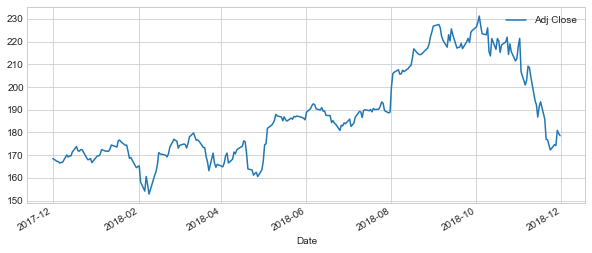

In [15]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

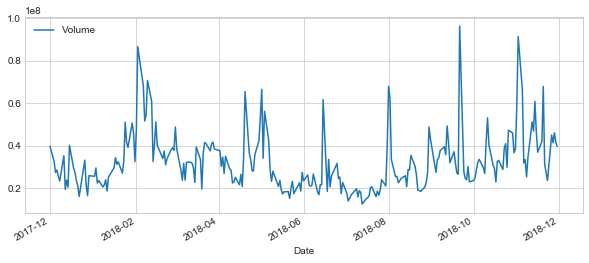

In [16]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

For more info on the moving average check out the following links:

1.) http://www.investopedia.com/terms/m/movingaverage.asp

2.) http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

In [17]:
# calculate moving average
# pandas has a built-in rolling mean calculator
# Let's go ahead and plot out several moving averages

ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    #AAPL[column_name] = pd.Series.rolling(AAPL['Adj Close'],window=ma).mean()
    AAPL[column_name] = DataFrame.rolling(AAPL['Adj Close'],ma).mean()

Now let's go ahead and plot all the additional Moving Averages

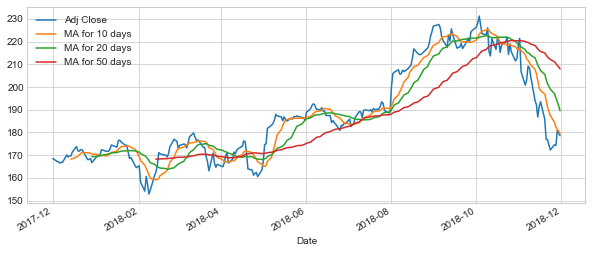

In [18]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a15839390>,
      dtype=object)

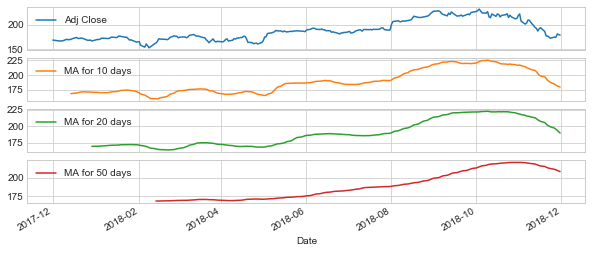

In [19]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=True,figsize=(10,4))

## Daily Return Analysis

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. We will use pandas to retrieve teh daily returns for the Apple stock.

In [20]:
# calculate daily returns and risk of the stock

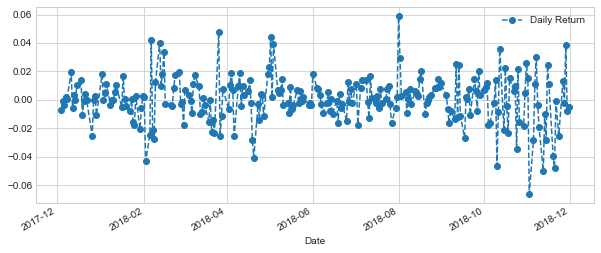

In [21]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

Let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


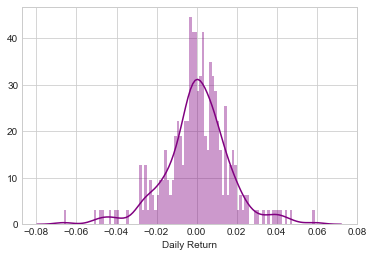

In [22]:
# average daily return
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

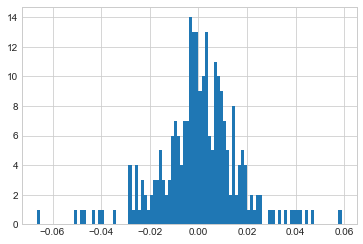

In [23]:
# other method, same result

AAPL['Daily Return'].hist(bins=100)

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [24]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = web.DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [25]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-01,168.519974,1162.349976,1010.169983,82.826172
2017-12-04,167.288483,1133.949951,998.679993,79.700279
2017-12-05,167.130829,1141.569946,1005.150024,80.201599
2017-12-06,166.510162,1152.349976,1018.380005,81.371353
2017-12-07,166.815567,1159.790039,1030.930054,81.086288


In [26]:
# daily returns for every stock

tech_rets = closing_df.pct_change()

In [27]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-01,NaN,NaN,NaN,NaN
2017-12-04,-0.007308,-0.024433,-0.011374,-0.037740
2017-12-05,-0.000942,0.006720,0.006479,0.006290
2017-12-06,-0.003714,0.009443,0.013162,0.014585
2017-12-07,0.001834,0.006456,0.012324,-0.003503


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


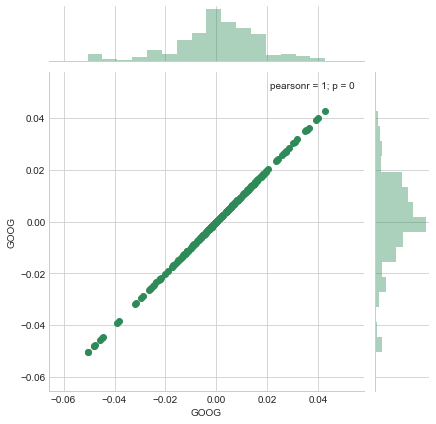

In [28]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


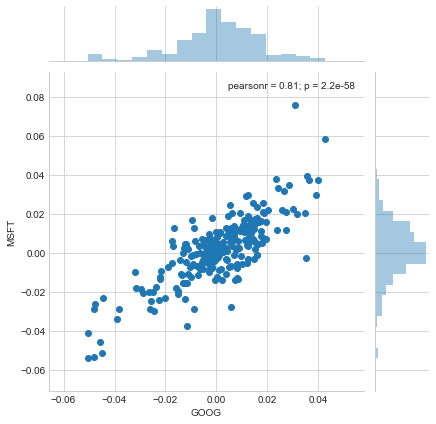

In [37]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

Intersting, the pearsonr value (officially known as the Pearson product-moment correlation coefficient) can give you a sense of how correlated the daily percentage returns are. You can find more information about it at this link:

url - http://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient

But for a quick intuitive sense, check out the picture below.

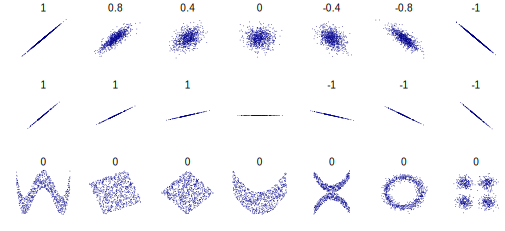

In [30]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

In [31]:
# comparison analysis for every possible combination of stocks

In [32]:
tech_rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-01,NaN,NaN,NaN,NaN
2017-12-04,-0.007308,-0.024433,-0.011374,-0.037740
2017-12-05,-0.000942,0.006720,0.006479,0.006290
2017-12-06,-0.003714,0.009443,0.013162,0.014585
2017-12-07,0.001834,0.006456,0.012324,-0.003503


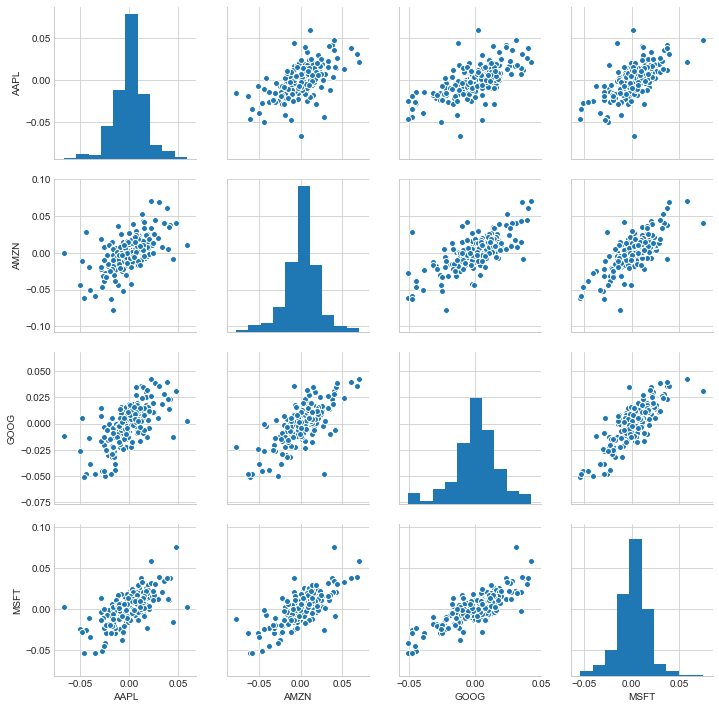

In [33]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s

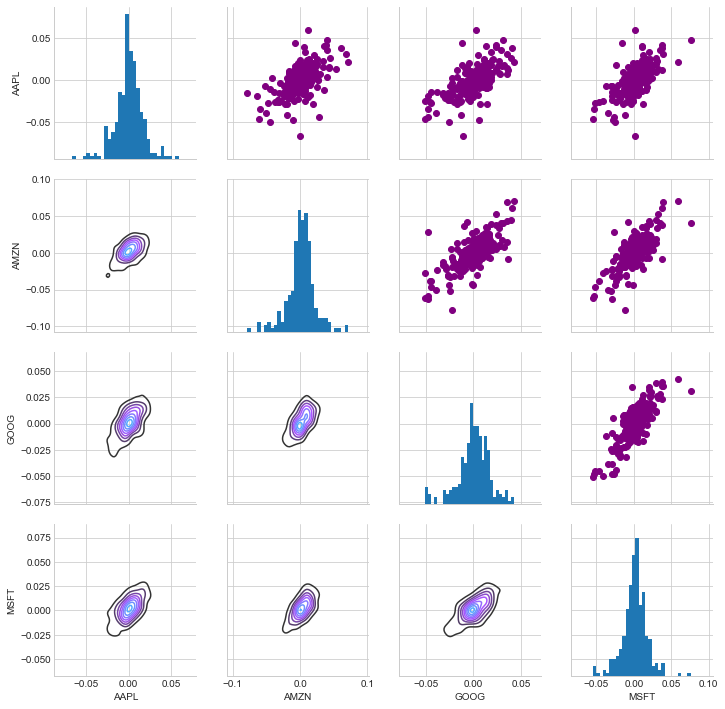

In [38]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

We could have also analyzed the correlation of the closing prices using this exact same technique. Here it is shown, the code repeated from above with the exception of the DataFrame called.

/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s

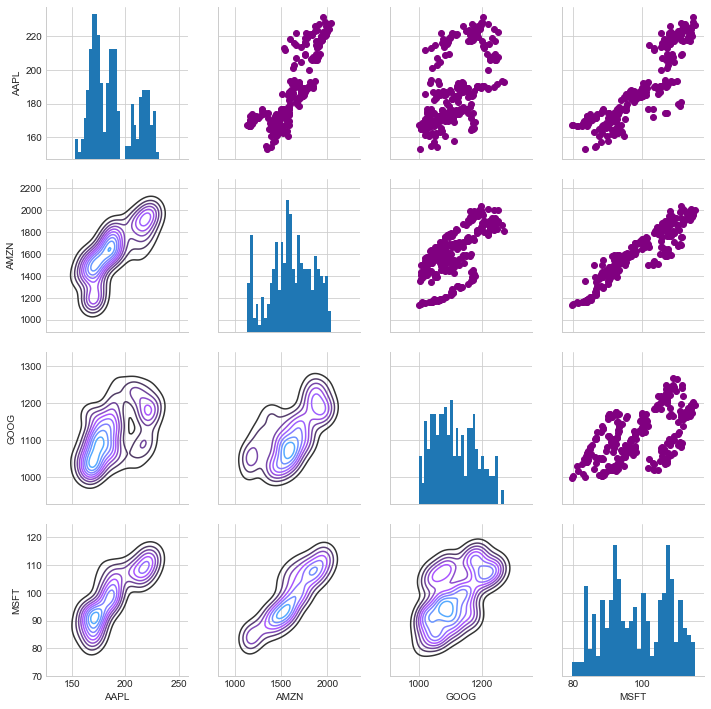

In [39]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

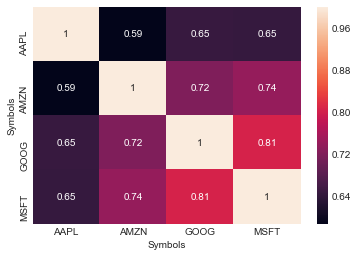

In [44]:
sns.heatmap(tech_rets.corr().dropna(),annot=True)

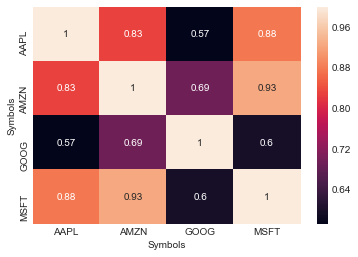

In [42]:
sns.heatmap(closing_df.corr(),annot=True)

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# Risk analysis

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.



In [46]:
rets = tech_rets.dropna()

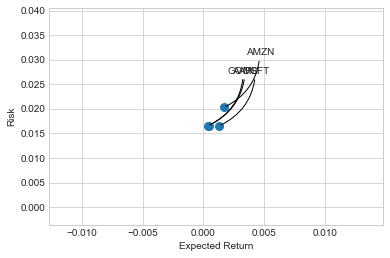

In [47]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))


### Value at Risk


Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. Theres several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

#### Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock.

/Users/tinaaggarwal/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


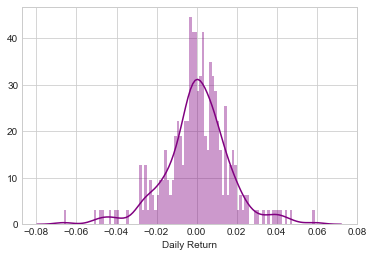

In [48]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [49]:
rets.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-12-04,-0.007308,-0.024433,-0.011374,-0.037740
2017-12-05,-0.000942,0.006720,0.006479,0.006290
2017-12-06,-0.003714,0.009443,0.013162,0.014585
2017-12-07,0.001834,0.006456,0.012324,-0.003503
2017-12-08,0.000295,0.001905,0.005936,0.020245


In [50]:
rets['AAPL'].quantile(0.05)

-0.026133602820020085

In [51]:
rets['AAPL'].quantile(0.1)

-0.0187701558839678

#### The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.026133602820020085

The 0.05 empirical quantile of daily returns is at -0.026. That means that with 95% confidence, our worst daily loss will not exceed 2.6%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.026 * 1,000,000 = $26,000.

Go ahead and repeat this for the other stocks in out portfolio, then afterwards we'll look at value at risk by implementing a Monte Carlo method.

#### Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.


The equation for geometric Browninan motion is given by the following equation:

$$\frac{\Delta S}{S} = \mu\Delta t + \sigma \epsilon \sqrt{\Delta t}$$ 

Where S is the stock price, mu is the expected return (which we calculated earlier),sigma is the standard deviation of the returns, t is time, and epsilon is the random variable.

We can mulitply both sides by the stock price (S) to rearrange the formula and solve for the stock price.

$$ \Delta S = S(\mu\Delta t + \sigma \epsilon \sqrt{\Delta t}) $$ 

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks, check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

To demonstrate a basic Monte Carlo method, we will start with just a few simulations. First we'll define the variables we'll be using the Google DataFrame GOOG

In [52]:
# Set up time horizon
days = 365

# delta
dt = 1/days

# Let's grab mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

Next, we will create a function that takes in the starting price and number of days, and uses teh sigma and mu we already calculated form out daily returns

In [53]:
def stock_mone_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

In [54]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-01,1022.489990,1002.020020,1015.799988,1010.169983,1909600,1010.169983
2017-12-04,1016.099976,995.570007,1012.659973,998.679993,1906400,998.679993
2017-12-05,1020.609985,988.280029,995.940002,1005.150024,2067300,1005.150024
2017-12-06,1024.969971,1001.140015,1001.500000,1018.380005,1272000,1018.380005
2017-12-07,1034.239990,1018.070984,1020.429993,1030.930054,1458200,1030.930054


Text(0.5,1,'Monte Carlo Analysis for Google')

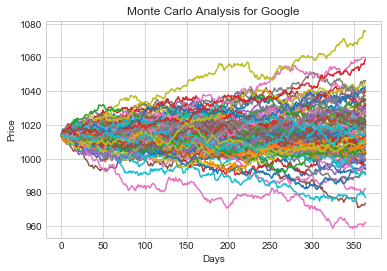

In [55]:
# Get start price from GOOG.head()
start_price = 1014.00

for run in range(100):
    plt.plot(stock_mone_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

Let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [57]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulation = np.zeros(runs)

for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulation[run] = stock_mone_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

Text(0.5,1,'Final price distribution for Google Stock after 365 days')

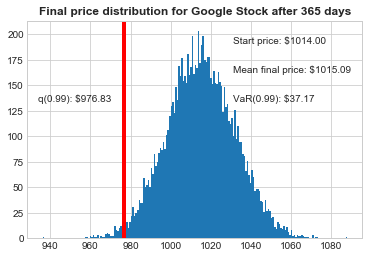

In [58]:
q=np.percentile(simulation,1)

plt.hist(simulation,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulation.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')

Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be $37.17 for every investment of 1014.00 (the price of one inital google stock).

This basically means for every initial stock you purchase your putting about $37.17 at risk 99% of the time from our Monte Carlo Simulation.